<a href="https://colab.research.google.com/github/AkothCarole/Hypothyrodism_SVM/blob/master/Week_8_IP_Caroline_Akoth_6_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining the task

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.    


**Define the question**

1. To determine whether or not patients symptoms indicate that the patient has hypothyroid

**Metric of success**

Create a model that identifies whether a patient has hypothyroid based on symptoms presented. 

**Experimental design taken**

**1. Decision trees**

    i. Random forests

    ii. Ada boosted trees

    iii. gradient boosted trees


Optimize models and determine which features are most impactful in influencing the prediction. 

**2. SVM using two features.** 

Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. 

Tune parameters to improve the performance of your model. 

To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step

**Data exploration**


i. Age

ii. Sex

iii. on_thyroxine

iv. query_on_thyroxine

v. on_antithyroid_medicationthyroid_surgery

vi. query_hypothyroid

vii. query_hyperthyroid

viii. pregnant

ix. sick

x. tumor

xi. lithium

xii. goitre

xiii. TSH_measured

xiv. TSH

xv. T3_measured

xvi. T3

xvii. TT4_measured

xviii. TT4






#Understanding the context

Hypothyroidism is a condition that prevents the  thyroid gland from producing thyroid hormones.

This leads to obesity, joint pain, infertility and heart disease.

Symptoms include: Fatigues, cold sensitvity, constipation, dry skin and unexplained weight gain. 

#Explore the dataset

In [0]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [5]:
#Read the data

data =pd.read_csv('hypothyroid.csv')
data.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

In [6]:
data.shape

(3163, 26)

In [7]:
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
#data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
for i, category in enumerate(categorical_cols):
  data[category] = le.fit_transform(data[category])

data[categorical_cols].head(10)
                                  

status  age  sex  on_thyroxine  ...  FTI_measured  FTI  TBG_measured  TBG
0       0   67    2             0  ...             1    2             0   52
1       0    6    1             1  ...             1   79             0   52
2       0   15    2             0  ...             1    0             0   52
3       0   15    1             0  ...             1  220             0   52
4       0   72    2             0  ...             1  196             0   52
5       0   81    1             0  ...             1  137             0   52
6       0   58    1             0  ...             1  226             0   52
7       0   67    1             0  ...             1  173             0   52
8       0   11    1             0  ...             1  173             0   52
9       0   34    1             0  ...             1  238             0   52

[10 rows x 26 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   status                     3163 non-null   int64
 1   age                        3163 non-null   int64
 2   sex                        3163 non-null   int64
 3   on_thyroxine               3163 non-null   int64
 4   query_on_thyroxine         3163 non-null   int64
 5   on_antithyroid_medication  3163 non-null   int64
 6   thyroid_surgery            3163 non-null   int64
 7   query_hypothyroid          3163 non-null   int64
 8   query_hyperthyroid         3163 non-null   int64
 9   pregnant                   3163 non-null   int64
 10  sick                       3163 non-null   int64
 11  tumor                      3163 non-null   int64
 12  lithium                    3163 non-null   int64
 13  goitre                     3163 non-null   int64
 14  TSH_measured            

In [9]:
#Find null values

data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [10]:
#Find duplicates

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3158    False
3159    False
3160    False
3161    False
3162    False
Length: 3163, dtype: bool

In [11]:
data.describe()

status          age  ...  TBG_measured          TBG
count  3163.000000  3163.000000  ...   3163.000000  3163.000000
mean      0.952261    50.978501  ...      0.082200    49.456529
std       0.213248    25.400502  ...      0.274713     8.984891
min       0.000000     0.000000  ...      0.000000     0.000000
25%       1.000000    29.000000  ...      0.000000    52.000000
50%       1.000000    51.000000  ...      0.000000    52.000000
75%       1.000000    69.000000  ...      0.000000    52.000000
max       1.000000    92.000000  ...      1.000000    52.000000

[8 rows x 26 columns]

**Decision Trees**

Most columns are categorical columns so we'll use decision tree classifier

In [12]:
data.head()

status  age  sex  on_thyroxine  ...  FTI_measured  FTI  TBG_measured  TBG
0       0   67    2             0  ...             1    2             0   52
1       0    6    1             1  ...             1   79             0   52
2       0   15    2             0  ...             1    0             0   52
3       0   15    1             0  ...             1  220             0   52
4       0   72    2             0  ...             1  196             0   52

[5 rows x 26 columns]

In [0]:
#convert categorical columns to numerical using .get dummies

#data = pd.get_dummies(data, prefix_sep='_', drop_first=True)

#data.head()

In [14]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone has hypothyroid, so let's use that column as our Y 
y = data['status'].values

test_features = ['age', 'on_thyroxine', 'query_hypothyroid', 'sick', 'goitre']
# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [16]:
#Let's finally create our model and assess its accuracy. 
#Checking the accuracy of a classifier is easy thanks to the metrics.accuracy_score function.

# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9541864139020537


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


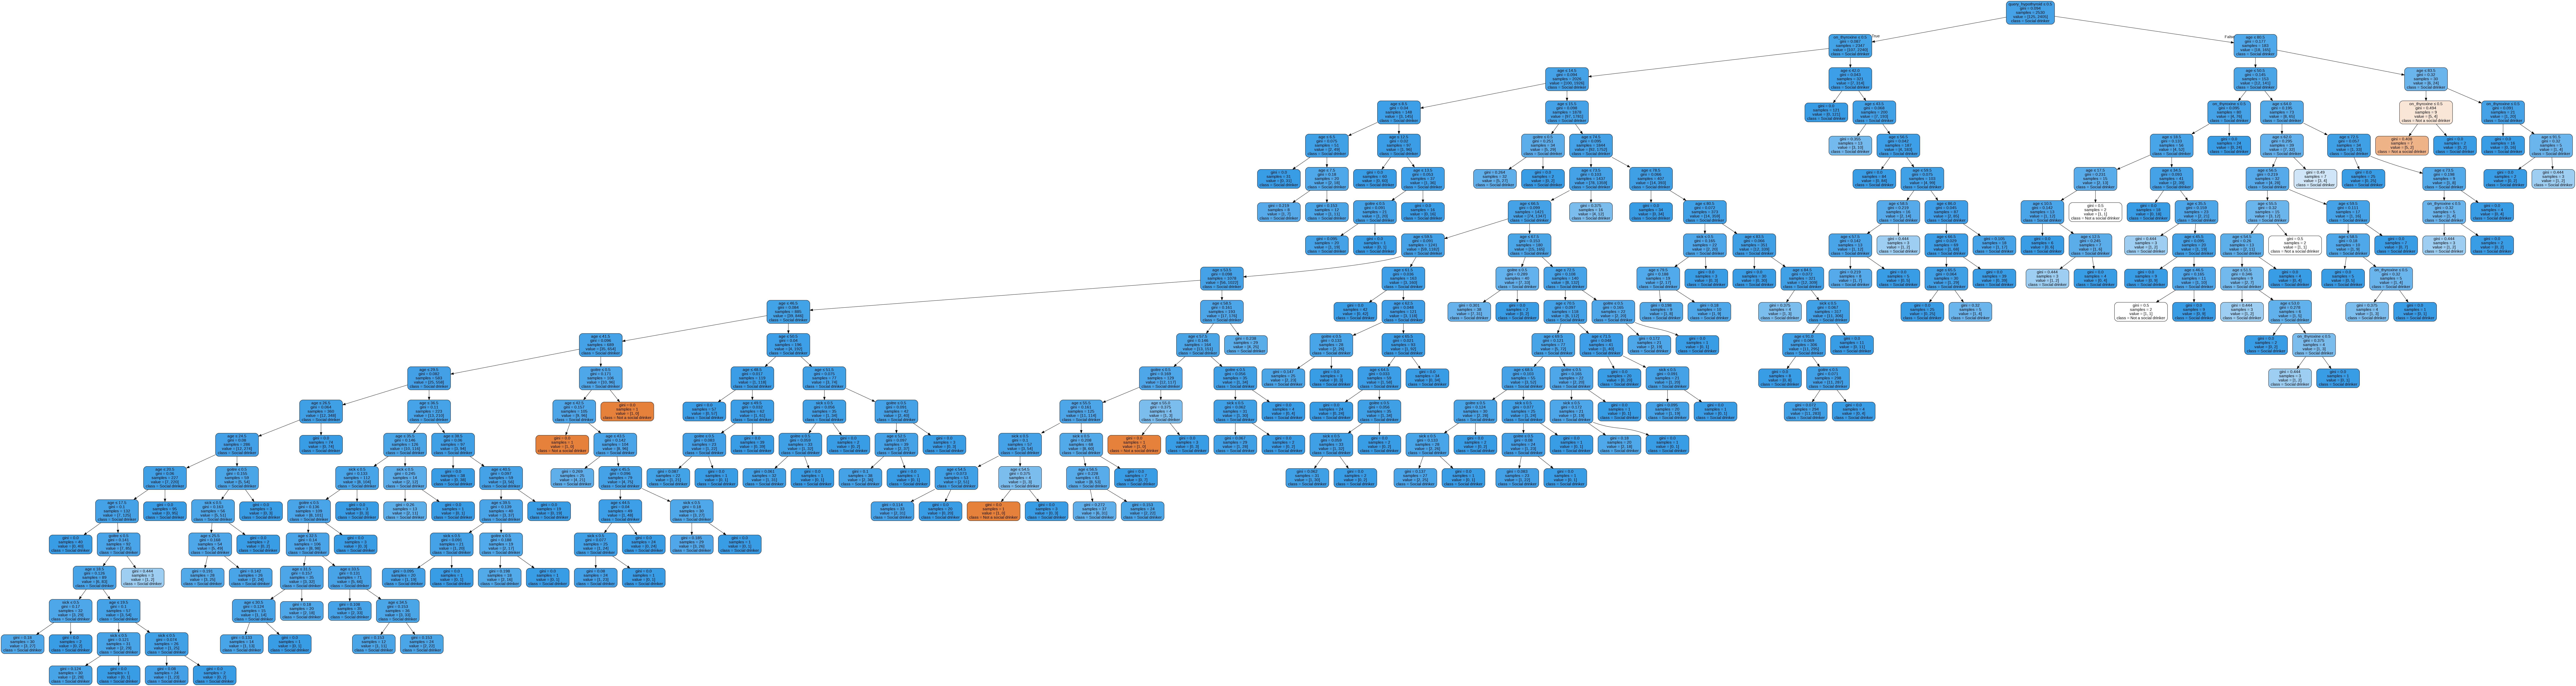

In [17]:
# Visualize the decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Not a social drinker', 'Social drinker'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid.png')
Image(graph.create_png())

**Decision Tree Regressor**

In [18]:
data.head()

status  age  sex  on_thyroxine  ...  FTI_measured  FTI  TBG_measured  TBG
0       0   67    2             0  ...             1    2             0   52
1       0    6    1             1  ...             1   79             0   52
2       0   15    2             0  ...             1    0             0   52
3       0   15    1             0  ...             1  220             0   52
4       0   72    2             0  ...             1  196             0   52

[5 rows x 26 columns]

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = data['status'].values
data.columns

test_features = ['age', 'on_thyroxine', 'query_hypothyroid', 'sick', 'goitre']
X = data[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [20]:
# Create a decision tree classifier

tree = DecisionTreeRegressor(min_samples_split = 20, max_depth=5)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

Actual   Predicted
count  949.000000  949.000000
mean     0.958904    0.949256
std      0.198617    0.053870
min      0.000000    0.375000
25%      1.000000    0.946244
50%      1.000000    0.946244
75%      1.000000    0.961165
max      1.000000    1.000000

In [21]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08864091169731696
Mean Squared Error: 0.04337104699572689
Root Mean Squared Error: 0.20825716553272997


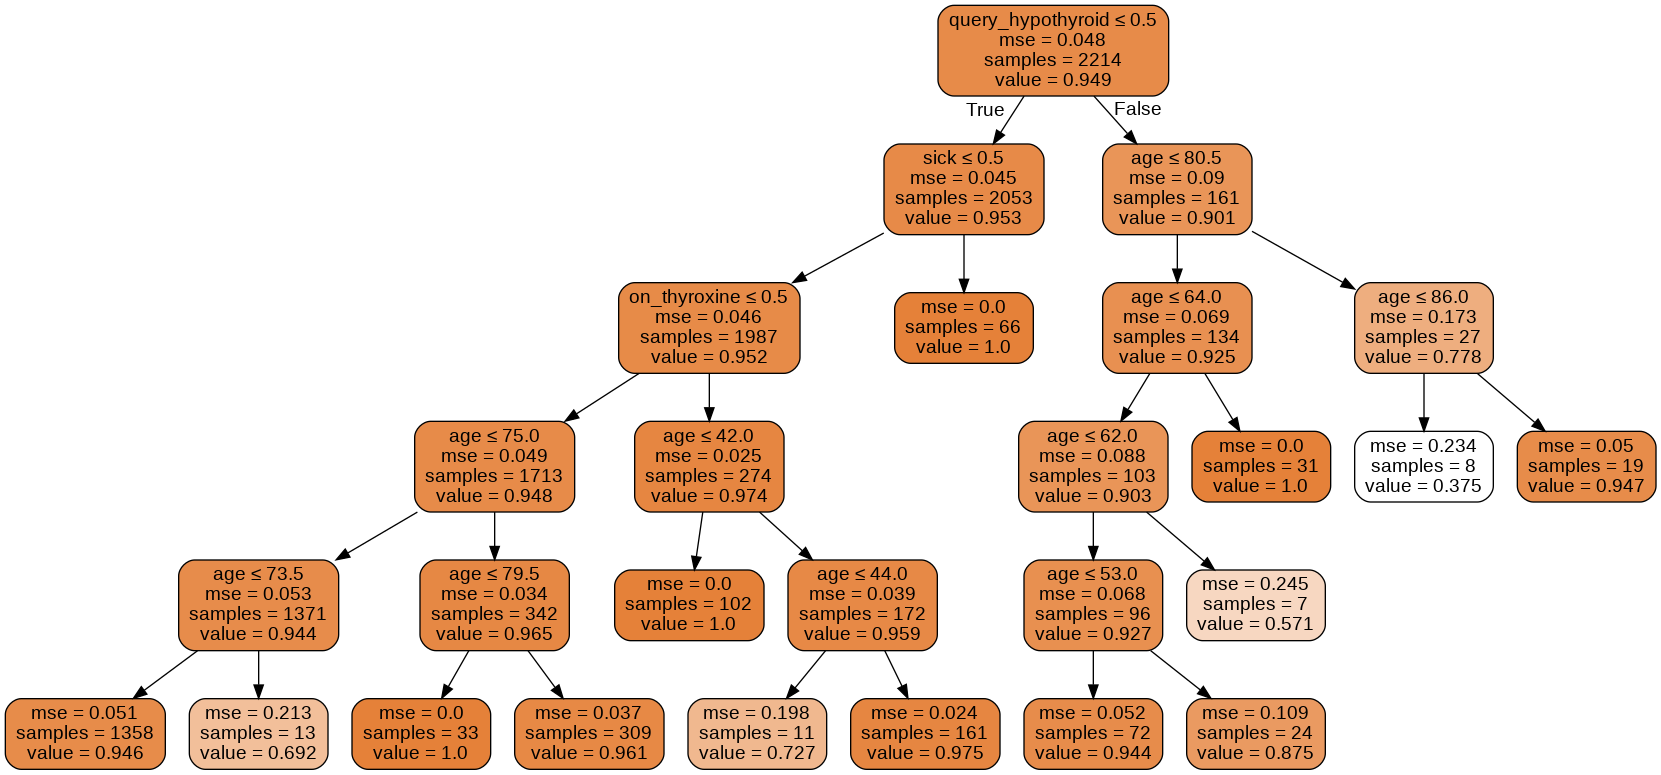

In [22]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothryroid.png')
Image(graph.create_png())

Optimizing our model


In [23]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.88), ('on_thyroxine', 0.03), ('query_hypothyroid', 0.07), ('sick', 0.03), ('goitre', 0.0)]

Variable: age                  Importance: 0.88
Variable: query_hypothyroid    Importance: 0.07
Variable: on_thyroxine         Importance: 0.03
Variable: sick                 Importance: 0.03
Variable: goitre               Importance: 0.0


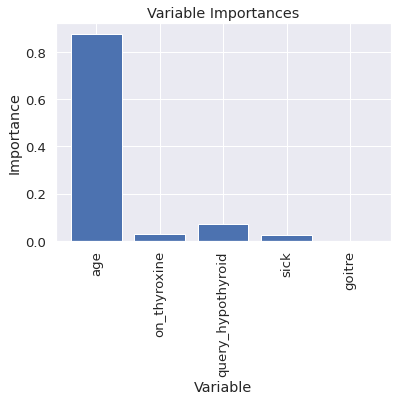

In [24]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


We have identified that the most importance variable is age


In [0]:
#comparison = pd.DataFrame( { 'actual' : y_test.flatten(),  'predicted' : y_pred.flatten() })

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier, we will set its max_depth to 6
tree = DecisionTreeRegressor(max_depth=6)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

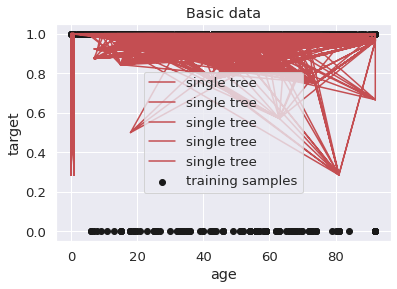

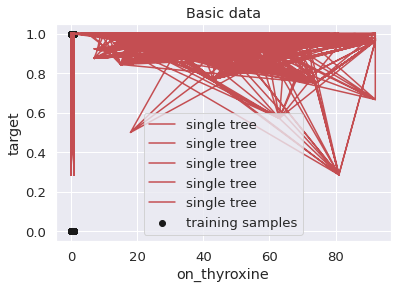

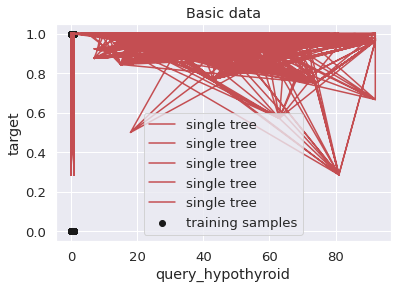

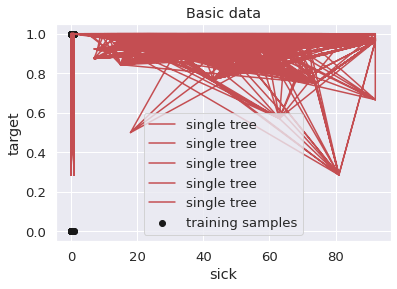

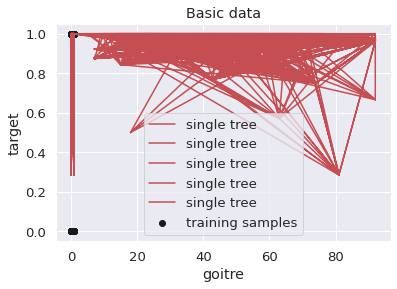

In [27]:
# Let's visualize what the data looks like
# Plot the results

for i, test in enumerate(test_features): 
  plt.figure()
  plt.scatter(data[test], y, c="k", label="training samples")
  #plt.scatter(X,y,c="k",label="training samples")
  plt.plot(X, y_pred_tree, c="r", label="single tree")
  plt.xlabel(test)
  plt.ylabel("target")
  plt.title("Basic data")
  plt.legend()
  plt.show()

#Adaboost 

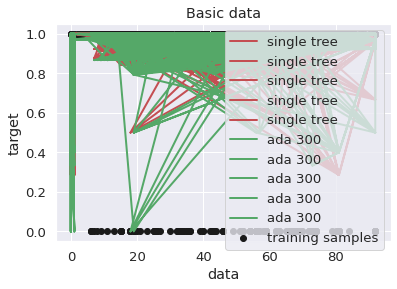

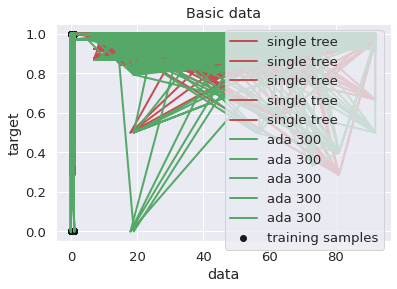

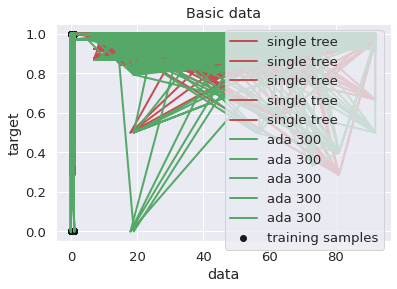

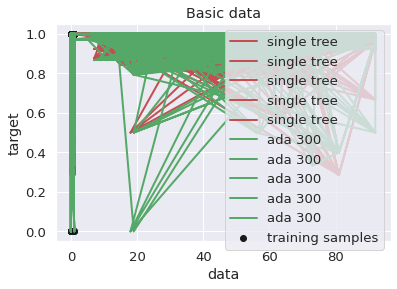

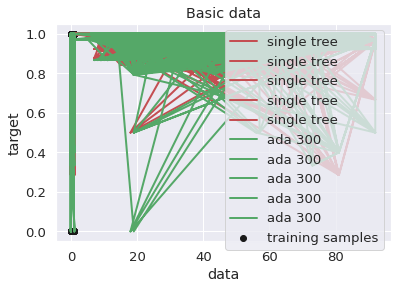

In [28]:
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. 
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                          n_estimators=700, random_state=1)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# plot the results

for i, test in enumerate(test_features):
  plt.figure()
  plt.scatter(data[test], y, c="k", label="training samples")
  plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=2)
  plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=2)

  plt.xlabel("data")
  plt.ylabel("target")
  plt.title("Basic data")
  plt.legend()
  plt.show()

Adaboost with a depth of 6 and 700 trees gives us better results than single decision tree.

**Gradient Boost Regressor**

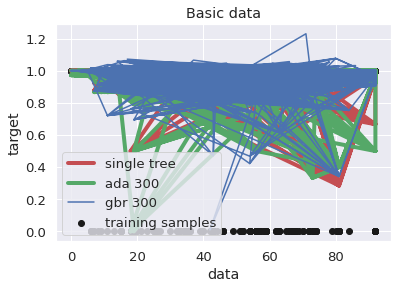

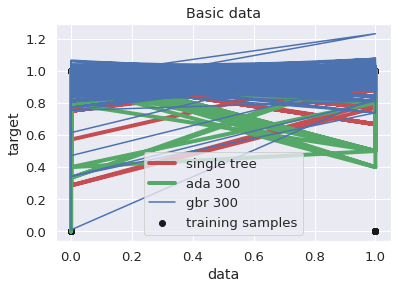

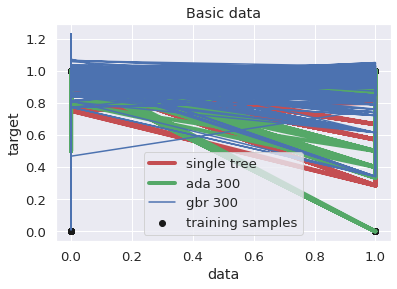

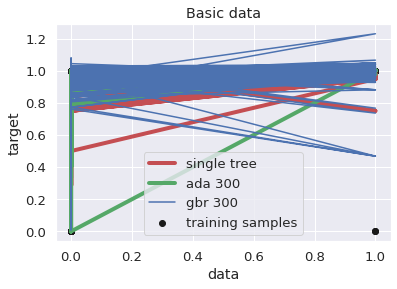

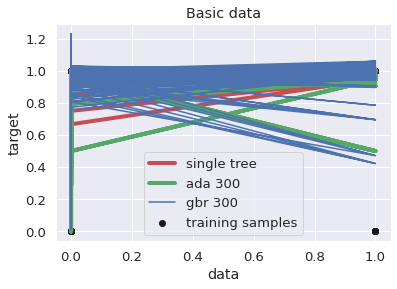

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 900

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.9, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

for i, test in enumerate(test_features):
  plt.figure()
  plt.scatter(data[test], y, c="k", label="training samples")
  plt.plot(data[test], y_pred_tree, c="r", label="single tree", linewidth=4)
  plt.plot(data[test], y_pred_ada, c="g", label="ada 300", linewidth=4)
  plt.plot(data[test], y_pred_gbr, c="b", label="gbr 300")
  plt.xlabel("data")
  plt.ylabel("target")
  plt.title("Basic data")
  plt.legend()
  plt.show()

Compared to Adaboost, gdr gives better results as it introduces learning rate. Using a learning rate of 0.9 and 900 trees

#Support Vector Machines

In [0]:
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
svm_model = SVC(kernel = 'linear', random_state=0)


In [31]:
#Read data again
data.head

<bound method NDFrame.head of       status  age  sex  on_thyroxine  ...  FTI_measured  FTI  TBG_measured  TBG
0          0   67    2             0  ...             1    2             0   52
1          0    6    1             1  ...             1   79             0   52
2          0   15    2             0  ...             1    0             0   52
3          0   15    1             0  ...             1  220             0   52
4          0   72    2             0  ...             1  196             0   52
...      ...  ...  ...           ...  ...           ...  ...           ...  ...
3158       1   51    1             0  ...             1  275             0   52
3159       1   20    1             0  ...             1  278             0   52
3160       1   72    2             0  ...             1    7             0   52
3161       1   69    1             0  ...             1   43             0   52
3162       1   49    1             1  ...             1   50             0   52

[3163 row

In [32]:
data.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [33]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

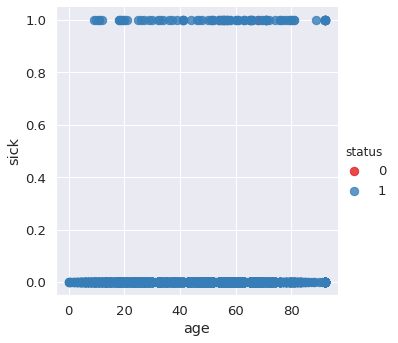

In [34]:
# Plot two ingredients

sns.lmplot('age', 'sick', data=data, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
#Fit our model
svm_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
#predicting with the test set
y_pred = svm_model.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [42]:
#Testing the accuracy of model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9589257503949447

In [43]:
# Performance Evaluation using Confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[  0,  26],
       [  0, 607]])

In [44]:
# Specify the input for the model

hypothyroid = data[['age', 'sick']].values
# Put a label of either a muffin or not and assign it 0 or 1
type_label = np.where(data['status']=='0',0,1)


# Fit the model
model = SVC(kernel= 'linear')
model.fit(hypothyroid,type_label)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: ignored

**Visualise the results**